In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# File doesn't have a header. Add it.
df = pd.read_csv("./files/fragment-dna-blast.csv", header=None)
df.columns = ["query", "subject", "identity", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore"]

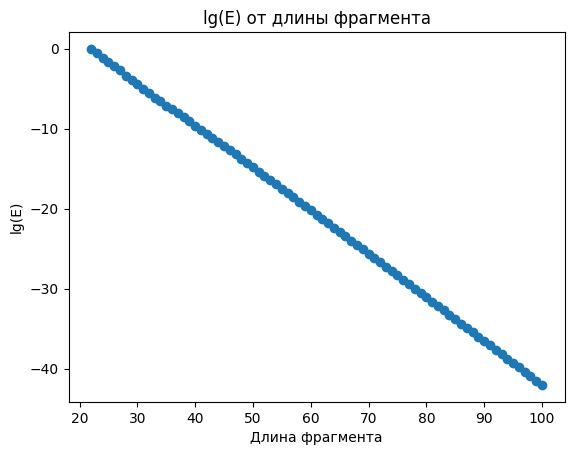

In [24]:
evalues = df.groupby("query")["evalue"].min()
fragment_lengths = df.groupby("query")["length"].max()

# На графике видно, что чем длиннее фрагмент, тем меньше evalue.
# Заметим, что lg(E) будет отрицательным для evalue < 1.
plt.scatter(fragment_lengths, evalues.apply(lambda x: np.log10(x)))
plt.xlabel("Длина фрагмента")
plt.ylabel("lg(E)")
plt.title("lg(E) от длины фрагмента")
plt.show()

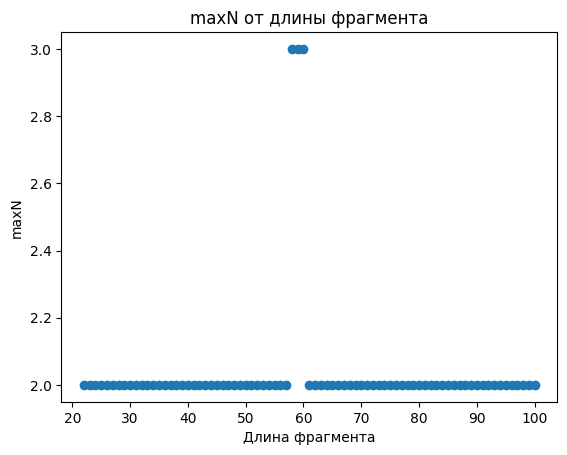

In [29]:
max_N = df.groupby("query")["identity"].apply(lambda x: x[x == x.max()].count())

# Почти всегда maxN = 2 (находятся человеческие белок и BAC clone). 
# Однако, для последовательностей длин 58, 59, 60 maxN становится равным 3
# из-за нахождения последовательности в геноме `Anania crocealis`.
plt.scatter(fragment_lengths, max_N)
plt.xlabel("Длина фрагмента")
plt.ylabel("maxN")
plt.title("maxN от длины фрагмента")
plt.show()